In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [3]:
members = pd.read_csv("members_v3.csv") 
train = pd.read_csv("train.csv")
training = pd.merge(left = train,right = members,how = 'left',on=['msno'])
training.head()



,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0


In [4]:
userlogs = pd.read_csv("user_logs_v2.csv") 
transactions = pd.read_csv("transactions.csv") 

In [5]:
transactions.head(10)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0
5,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,20150930,20151107,0
6,m5ptKif9BjdUghHXXomSezy5ohJiHm85PE13f/3kQaw=,39,30,149,149,1,20150930,20151128,0
7,uQxbyACsPOEkTIrv9jZgoGXelGBW81ZsSZKy9fhj5Z8=,39,30,149,149,1,20150930,20151125,0
8,LUPRfoE2r3WwVWhYO/TqQhjrL/qP6CO+/ORUlr7yNc0=,39,30,149,149,1,20150930,20151222,0
9,pMVjPLgVknaJYm9L0xUwxA2jmhpK7gfhGnsmmwX1mrE=,39,30,149,149,1,20150930,20151118,0


In [6]:
userlogs = userlogs[0:1000000]
userlogs = userlogs.dropna()
transactions = transactions.dropna()

In [7]:
merged_inner = pd.merge(left=transactions,right=userlogs, left_on='msno', right_on='msno')

In [8]:
merged_inner.head(10)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0,20170323,16,34,3,2,140,160,39207.449
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20151130,20151231,0,20170323,16,34,3,2,140,160,39207.449
2,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20160229,20160331,0,20170323,16,34,3,2,140,160,39207.449
3,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20161130,20161231,0,20170323,16,34,3,2,140,160,39207.449
4,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150331,20150430,0,20170323,16,34,3,2,140,160,39207.449
5,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20160731,20160831,0,20170323,16,34,3,2,140,160,39207.449
6,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20151231,20160131,0,20170323,16,34,3,2,140,160,39207.449
7,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20160831,20160930,0,20170323,16,34,3,2,140,160,39207.449
8,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,0,0,149,1,20150430,20150531,0,20170323,16,34,3,2,140,160,39207.449
9,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20160930,20161031,0,20170323,16,34,3,2,140,160,39207.449


In [9]:
print(merged_inner.shape)
# Select rows 0, 1, 2 (row 3 is not selected)
down = merged_inner[0:1000000]
down = down.dropna()
print(down.shape)

(13240265, 17)
(1000000, 17)


In [10]:
training = training.dropna()

In [11]:
final = pd.merge(left=training,right=down, left_on='msno', right_on='msno')
print(final.shape)

(525179, 23)


In [12]:
print(final.dtypes)
final['gender'].replace('female',0,inplace=True)
final['gender'].replace('male',1,inplace=True)

msno                       object
is_churn                    int64
city                      float64
bd                        float64
gender                     object
registered_via            float64
registration_init_time    float64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
date                        int64
num_25                      int64
num_50                      int64
num_75                      int64
num_985                     int64
num_100                     int64
num_unq                     int64
total_secs                float64
dtype: object


In [13]:
final.to_csv("final.csv",index=False)

In [14]:
#split dataset in features and target variable
feature_cols = ["city","bd","gender","registered_via","payment_method_id","payment_plan_days","plan_list_price","actual_amount_paid","is_auto_renew","transaction_date","membership_expire_date","date","num_25","num_50","num_75","num_985","num_100","num_unq","total_secs"]
X = final[feature_cols] # Features
y = final.is_churn # Target variable

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9984068954136359


In [18]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
ynew = clf.predict(X_test.iloc[[70]])
if ((ynew[0]) == 1):
    print("The user will churn as predicted value=%s" % (ynew[0]))
else:
    print("The user will not churn as predicted value=%s" % (ynew[0]))

The user will churn as predicted value=1


In [40]:
X_test.iloc[[70]]

,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
5501,9.0,26.0,1,9.0,20151130.0,38,10,0,0,0,20151130,20151220,20170305,5,0,0,0,8,11,1905.742


In [41]:
# Get a tuple of unique values & their first index location from a numpy array
uniqueValues, indicesList = np.unique(y_pred, return_index=True)
 
print('Unique Values : ', uniqueValues)
print('Indices of Unique Values : ', indicesList)

Unique Values :  [0 1]
Indices of Unique Values :  [ 0 70]


In [53]:
# for item in range(0, len(y_pred)):
#     if (y_pred[item] == 1):
#         print(item)
        
print(X_test.iloc[[336]])

      city    bd  gender  registered_via  registration_init_time  \
2807   5.0  25.0       0             9.0              20071212.0   

      payment_method_id  payment_plan_days  plan_list_price  \
2807                 36                 30              180   

      actual_amount_paid  is_auto_renew  transaction_date  \
2807                 180              0          20160802   

      membership_expire_date      date  num_25  num_50  num_75  num_985  \
2807                20160901  20170313       0       0       0        0   

      num_100  num_unq  total_secs  
2807        4        1     679.288  


In [19]:
# Create DKNeighborsClassifier object
clf1 = KNeighborsClassifier()

# Train DKNeighborsClassifier Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test)

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9847226982494891


In [21]:
# Create RandomForestClassifier object
clf2 = RandomForestClassifier()

# Train RandomForestClassifier Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9988194523782322


[0.08502385 0.09739259 0.02359098 0.01989383 0.03229676 0.01060162
 0.01007803 0.01673994 0.03305992 0.02719639 0.02796741 0.08115652
 0.07441762 0.04697176 0.03697517 0.04100899 0.09072202 0.0959339
 0.14897268]


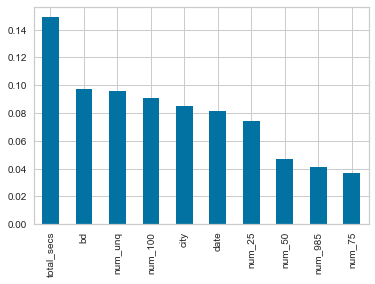

In [23]:
#Feature importance
import matplotlib.pyplot as plt
print(clf2.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf2.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [24]:
#split dataset in features and target variable
#feature_cols_red = ["bd","registration_init_time","num_100","num_unq","total_secs"]
feature_cols_red = ["bd","registration_init_time","num_100"]
X_red = final[feature_cols_red] # Features
y_red = final.is_churn # Target variable

# Split dataset into training set and test set
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=1) # 70% training and 30% test

# Create RandomForestClassifier object
clf_red = RandomForestClassifier()

# Train RandomForestClassifier Classifer
clf_red = clf_red.fit(X_train_red,y_train_red)

#Predict the response for test dataset
y_pred_red = clf_red.predict(X_test_red)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_red, y_pred_red))

from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(clf_red, 'model_red.pkl') 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9997905480025896


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['model_red.pkl']

In [25]:
# Create AdaBoostClassifier object
clf3 = AdaBoostClassifier()

# Train AdaBoostClassifier Classifer
clf3 = clf3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test)

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9842657120733209


In [27]:
# Create QuadraticDiscriminantAnalysis object
clf4 = QuadraticDiscriminantAnalysis()

# Train QuadraticDiscriminantAnalysis Classifer
clf4 = clf4.fit(X_train,y_train)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test)

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.9593980476535029


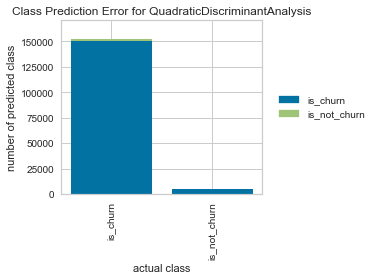

In [29]:
#Vis for QDA

# Instantiate the classification model and visualizer
classes = ["is_churn", "is_not_churn"]

visualizer = ClassPredictionError(
    QuadraticDiscriminantAnalysis(), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

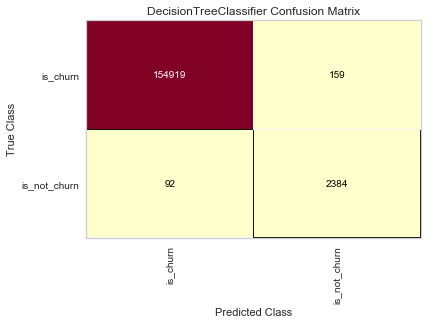

In [30]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf, classes = ["is_churn", "is_not_churn"])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()


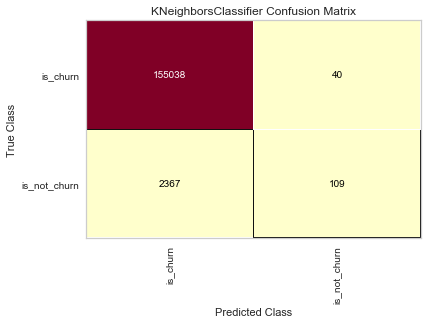

In [31]:
# The ConfusionMatrix visualizer taxes a model
cm1 = ConfusionMatrix(clf1, classes = ["is_churn", "is_not_churn"])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm1.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm1.score(X_test, y_test)

# How did we do?
cm1.show()

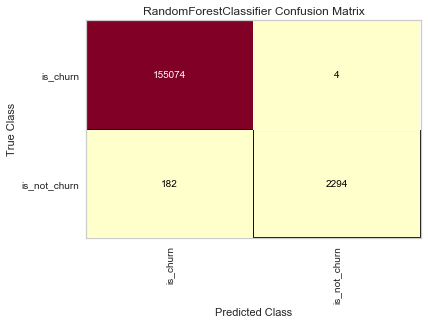

In [32]:
# The ConfusionMatrix visualizer taxes a model
cm2 = ConfusionMatrix(clf2, classes = ["is_churn", "is_not_churn"])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm2.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm2.score(X_test, y_test)

# How did we do?
cm2.show()

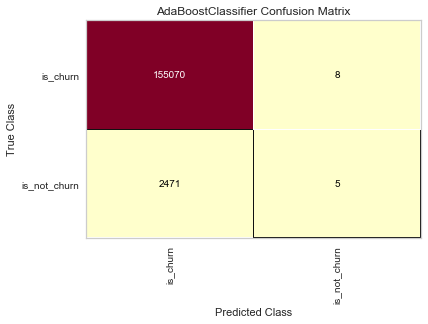

In [33]:
# The ConfusionMatrix visualizer taxes a model
cm3 = ConfusionMatrix(clf3, classes = ["is_churn", "is_not_churn"])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm3.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm3.score(X_test, y_test)

# How did we do?
cm3.show()

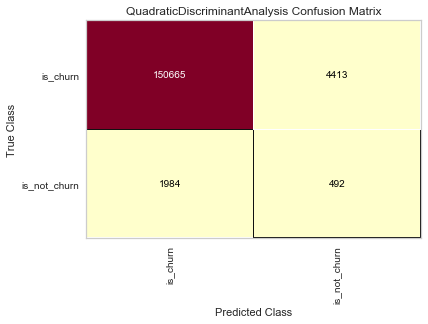

In [34]:
# The ConfusionMatrix visualizer taxes a model
cm4 = ConfusionMatrix(clf4, classes = ["is_churn", "is_not_churn"])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm4.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm4.score(X_test, y_test)

# How did we do?
cm4.show()

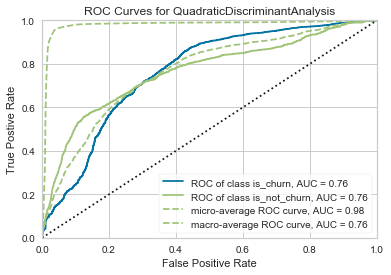

In [35]:
#ROCAUC (Receiver Operating Characteristic/Area Under the Curve)

visualizer = ROCAUC(clf4, classes = ["is_churn", "is_not_churn"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

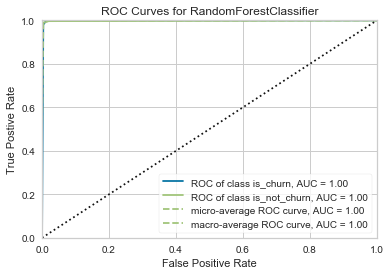

In [43]:
#ROCAUC (Receiver Operating Characteristic/Area Under the Curve)

visualizerrf = ROCAUC(clf2, classes = ["is_churn", "is_not_churn"])

visualizerrf.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizerrf.score(X_test, y_test)        # Evaluate the model on the test data
visualizerrf.show()   

In [36]:
#f1 score and precision score for model 1: DecisionTreeClassifier
f1 = f1_score(y_test, y_pred, average='macro') 
print(f1)
p = average_precision_score(y_test, y_pred)
print(p)
r = recall_score(y_test, y_pred, average='macro')
print(r)

0.9745902964129245
0.903225852380853
0.9809090025695757


In [37]:
#f1 score and precision score for model 2: DKNeighborsClassifier
f1 = f1_score(y_test, y_pred1, average='macro') 
print(f1)
p = average_precision_score(y_test, y_pred1)
print(p)
r = recall_score(y_test, y_pred1, average='macro')
print(r)

0.5376724000071318
0.04722788541776329
0.5218823412038355


In [38]:
#f1 score and precision score for model 3: RandomForestClassifier
f1 = f1_score(y_test, y_pred2, average='macro') 
print(f1)
p = average_precision_score(y_test, y_pred2)
print(p)
r = recall_score(y_test, y_pred2, average='macro')
print(r)

0.980219803397412
0.926036808360382
0.9632342761236146


In [39]:
#f1 score and precision score for model 4: AdaBoostClassifier
f1 = f1_score(y_test, y_pred3, average='macro') 
print(f1)
p = average_precision_score(y_test, y_pred3)
print(p)
r = recall_score(y_test, y_pred3, average='macro')
print(r)

0.4980439487212976
0.016460198648968638
0.5009838995816395


In [40]:
#f1 score and precision score for model 5: QuadraticDiscriminantAnalysis
f1 = f1_score(y_test, y_pred4, average='macro') 
print(f1)
p = average_precision_score(y_test, y_pred4)
print(p)
r = recall_score(y_test, y_pred4, average='macro')
print(r)

0.5562636813850844
0.03252403410267816
0.5851254726346371


In [41]:

import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(clf2) 
  
# # Load the pickled model 
# knn_from_pickle = pickle.loads(saved_model) 
  
# # Use the loaded pickled model to make predictions 
# knn_from_pickle.predict(X_test) 


In [42]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(clf2, 'model.pkl') 
  

['model.pkl']